>__ACK:__ *** This whole code is developed by __Shama Satter__ ***

# __Create environment for running AI program__

> __Install libraris__ https://pypi.org

In [30]:
# %pip install pandas
# %pip install heartpy
# %pip install tsfel
# %pip install librosa
# %pip install statsmodels
# %pip install lightgbm
# %pip install catboost
# %pip install xgboost

> __Import libraries and dependencies__

In [31]:
import pandas as pd
import numpy as np
import heartpy as hp
from   matplotlib import pyplot as plt
import tsfel
import scipy 
import sklearn as sk
from   sklearn.ensemble import RandomForestRegressor
import librosa
import csv
import pandas as pd
import os
import xgboost as xgb
import random
import statsmodels.regression
from   warnings import filterwarnings
import lightgbm as ltb
from   sklearn import metrics
import catboost as cab
from   sklearn.model_selection import GridSearchCV
import time
from   datetime import datetime
from   sklearn.metrics import mean_squared_error, accuracy_score
from   sklearn.metrics import r2_score
from   IPython.display import clear_output
from sklearn.model_selection import KFold

# __Data collection & preprocessing__

> Mount Gdrive

In [32]:
# from google.colab import drive
# drive.mount('/content/gdrive')

> Inserting Data

In [33]:
## PPG Data
# define parent directory of PPG files
# PPG_dataDirectory = 'gdrive/My Drive/Colab Notebooks/SCI#02/DataBase/data/'
PPG_dataDirectory = './DataBase/Selected_PPG_wrist/'
# PPG CSV filenames
PPG_data =  [   
            '210823_4.csv',   
            '210830_0.csv',   
            '210927_0.csv',             
            '210927_1.csv',             
            '210927_2.csv',            
            '210928_0.csv',                       
            '210928_1.csv',          
            '210929_0.csv',           
            '210930_0.csv',            
            '210930_1.csv',            
            '210930_2.csv',           
            '210930_3.csv',            
            '210930_4.csv',           
            '210930_5.csv',         
            '211001_0.csv',         
            '211001_1.csv', 
            '211001_2.csv',
            '211018_1.csv',
            '211018_2.csv',
            '211018_3.csv',
            '211018_4.csv',
            '211019_0.csv',
            '211026_0.csv',
            '211026_1.csv',
            '211026_2.csv',
            '211026_3.csv',
            '211115_0.csv',
            '211115_1.csv',         
            ]
# Assigning complete filename of PPG CSV data
PPG_csvData = []
for fileName in PPG_data:
    PPG_csvData.append(PPG_dataDirectory+fileName)


## HbA1c data
HbA1c_data  =   [ 
                8.4,5.4,7.6,5.5,5.4,6.0,5.3,6.3,5.7,4.9,5.6,5.5,5.2,5.2,5.5,5.8,5.7,5.6,5.5,5.7,5.6,7.4,6.2,7.0,6.3,5.3,8.2,6.7
                ]


## SpO2 data
SpO2_data   =   [ 96,97,97,98,97,96,97,97,96,96,97,95,95,98,97,95,97,97,97,97,97,96,97,96,97,98,97,97                
                ]


## Age data
Age_data    =   [ 
                34,25,63,26,25,63,30,27,25,34,
                35
                ]


## Gender data
Gender_data =   [ 
                'M','F','M','M','F','M','F','M','M','M',
                'M','M','F','F','M','M','M','M','M','M','M','M','M','M','M','M','M','M'
                ]


                
## BMI data
BMI_data    =   [ 
                28.71,23.6,28.71,24,23.6,23.3,27.9,25.8,25.82,19.71,22.72,33.96,20.64,22.04,25.26,20.6,20.4,33.3,26.4,22.2,30.1,28.71,19.6,25.8,29.1,32.8,30.4,21.7
                ]


print('*****************PPG_csvData******************')
print(PPG_csvData)
print('Data counted = '+ str(len(PPG_csvData)))
print('******************HbA1c_data******************')
print(HbA1c_data)
print('Data counted = '+ str(len(HbA1c_data)))
print('******************SpO2_data*******************')
print(SpO2_data)
print('Data counted = '+ str(len(SpO2_data)))
print('*******************Age_data*******************')
print(Age_data)
print('Data counted = '+ str(len(Age_data)))
print('*****************Gender_data******************')
print(Gender_data)
print('Data counted = '+ str(len(Gender_data)))


print('******************BMI_data********************')
print(BMI_data)
print('Data counted = '+ str(len(BMI_data)))

*****************PPG_csvData******************
['./DataBase/Selected_PPG_wrist/210823_4.csv', './DataBase/Selected_PPG_wrist/210830_0.csv', './DataBase/Selected_PPG_wrist/210927_0.csv', './DataBase/Selected_PPG_wrist/210927_1.csv', './DataBase/Selected_PPG_wrist/210927_2.csv', './DataBase/Selected_PPG_wrist/210928_0.csv', './DataBase/Selected_PPG_wrist/210928_1.csv', './DataBase/Selected_PPG_wrist/210929_0.csv', './DataBase/Selected_PPG_wrist/210930_0.csv', './DataBase/Selected_PPG_wrist/210930_1.csv', './DataBase/Selected_PPG_wrist/210930_2.csv', './DataBase/Selected_PPG_wrist/210930_3.csv', './DataBase/Selected_PPG_wrist/210930_4.csv', './DataBase/Selected_PPG_wrist/210930_5.csv', './DataBase/Selected_PPG_wrist/211001_0.csv', './DataBase/Selected_PPG_wrist/211001_1.csv', './DataBase/Selected_PPG_wrist/211001_2.csv', './DataBase/Selected_PPG_wrist/211018_1.csv', './DataBase/Selected_PPG_wrist/211018_2.csv', './DataBase/Selected_PPG_wrist/211018_3.csv', './DataBase/Selected_PPG_wrist/2

> Making array

In [34]:
PPG_csvArray  = np.asarray(PPG_csvData)
HbA1c_Array   = np.asarray(HbA1c_data)
SpO2_Array    = np.asarray(SpO2_data)
Age_Array     = np.asarray(Age_data)
Gender_Array  = np.asarray(Gender_data)
BMI_Array     = np.asarray(BMI_data)

# __User Defined Functions and Algorithms__

> __Function 00:__ Visualize PPG signal

In [35]:
def visual_PPG(PPG, drawFigure=True):

    for i in range (0,len(PPG)):
        
        # Getting corresponding Combined PPG Data 
        dat    = pd.read_csv(PPG[i], delimiter=',', header=None)
        print('********************************')
        print('Index='+str(i)+' || '+str(PPG[i]))
        print('********************************')
        if (dat.shape[1] == 3):
           bs = dat.iloc[:,2]
           gs = dat.iloc[:,1]
           rs = dat.iloc[:,0]
        else:
           bs = dat.iloc[:,3]
           gs = dat.iloc[:,2]
           rs = dat.iloc[:,1]
    
        # Visualization **Don't mention inside the pseudo code**
        if drawFigure:
           plt.rcParams.update(plt.rcParamsDefault)
           plt.rcParams['font.size'] = '8'
           fig,axs = plt.subplots(3, figsize=(20, 5))
           axs[0].set(title='Visualization of Wrist PPG Signal')
           axs[0].plot(bs, color='blue', label='blue signal')
           axs[0].set(ylabel = ' ')
           axs[0].legend(loc=1)
           axs[0].grid(True)
           axs[1].plot(gs, color='green', label='green signal')
           axs[1].set(ylabel = ' ', xlabel = ' ')
           axs[1].legend(loc=1)
           axs[1].grid(True)
           axs[2].plot(rs, color='red', label='red signal')
           axs[2].set(ylabel = ' ', xlabel = ' ')
           axs[2].legend(loc=1)
           axs[2].grid(True)
           plt.show()
        
    # Return
    return

> __Function 01:__ BA_Plot

In [36]:
def bland_altman_plot(data1, data2):
    data1     = np.asarray(data1)
    data2     = np.asarray(data2)
    mean      = np.mean([data1, data2], axis=0)
    diff      = data1 - data2                   # Difference between data1 and data2
    md        = np.mean(diff)                   # Mean of the difference
    sd        = np.std(diff, axis=0)            # Standard deviation of the difference

    plt.scatter(mean, diff,   c = 'black')
    plt.axhline(md,           color='green', linestyle='--')
    plt.axhline(md + 1.96*sd, color='red',   linestyle='--')
    plt.axhline(md - 1.96*sd, color='red',   linestyle='--')
    plt.xlabel("Average of the two measures", fontsize = 14)
    plt.ylabel("Difference between the two measures", fontsize = 14)
    plt.title("Bland-Altman plot for estimated %HbA1c values", fontsize = 14)
    # plt.savefig('./Figure/RF_trans_BA_Plot.png', bbox_inches = "tight", transparent = True, dpi = 400)

> __Function 02:__ EGA_Plot

In [37]:
from matplotlib.patches import Circle, Wedge, Polygon, Path
from matplotlib.collections import PatchCollection

def error_grid_analysis(ref,est):
    fig, ax = plt.subplots()

    polygons = []

    A  = [[4.0,4.0],[5.7,4.0],[5.7,5.4],[7.2,6.5],[12.0,6.5],[12.0,12.0],[6.5,12.0],[6.5,7.2],[5.4,5.7],[4.0,5.7]]
    Bd = [[5.7,4.0],[5.7,5.4],[7.2,6.5],[12.0,6.5],[12.0,5.7],[6.5,5.7],[6.5,4.0]]
    Bu = [[4.0,5.7],[5.4,5.7],[6.5,7.2],[6.5,12.0],[5.7,12.0],[5.7,6.5],[4.0,6.5]]
    Cd = [[6.5,4.0],[6.5,5.7],[12.0,5.7],[12.0,4.0]]
    Cu = [[4.0,6.5],[5.7,6.5],[5.7,12.0],[4.0,12.0]]

    # print(np.asarray(A).shape)
    pA  = Polygon(np.asarray(A))
    pBd = Polygon(np.asarray(Bd))
    pBu = Polygon(np.asarray(Bu))
    pCd = Polygon(np.asarray(Cd))
    pCu = Polygon(np.asarray(Cu))

    polygons.append(pA)
    polygons.append(pBd)
    polygons.append(pBu)
    polygons.append(pCd)
    polygons.append(pCu)


    p = PatchCollection(polygons)
    p.set_color([[0,1,0,0.3],[1,1,0,0.3],[1,1,0,0.3],[1,0,0,0.3],[1,0,0,0.3]])
    ax.add_collection(p)



    plt.plot([4.0,12.0],[4.0,12.0])


    x = ref
    y = est

    sA = []
    sB = []
    sC = []
    for i in range(len(y)):
        sA.append(int(pA.contains_point ([x[i],y[i]]))*30)
        sB.append(int(pBd.contains_point([x[i],y[i]]) or pBu.contains_point([x[i],y[i]]))*30)
        sC.append(int(pCd.contains_point([x[i],y[i]]) or pCu.contains_point([x[i],y[i]]))*30)


    plt.scatter(x,y,s=sA,color=[0.227, 0.513, 0.282,1])
    plt.scatter(x,y,s=sB,color=[0.886, 0.654, 0.133,1])
    plt.scatter(x,y,s=sC,color=[0.941, 0, 0.098,1])

    lx = np.linspace(min(x), max(x), 100)
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(lx,p(lx))


    plt.text(10.5,9,'A',fontsize=26)
    plt.text(9,10.5,'A',fontsize=26)
    plt.text(10.5,5.94,'B',fontsize=26)
    plt.text(5.94,10.5,'B',fontsize=26)
    plt.text(10.5,4.7,'C',fontsize=26)
    plt.text(4.7,10.5,'C',fontsize=26)
    fig.set_figheight(8)
    fig.set_figwidth(8)
    plt.xlim([4.0,12.0])
    plt.ylim([4.0,12.0])
    plt.xlabel('HbA1c Invasive device (%NGSP)',fontsize=15)
    plt.ylabel('HbA1c Estimated (%NGSP)',fontsize=15)
    plt.title('Error Grid Analysis (EGA) for estimated %HbA1c values',fontsize=15)
    plt.show()

> __Function 03:__ Evaluation
>> ACK: __Developed by Shama__. _To visualize performance and evaluate model_

In [38]:
def evaluation_metrics_including_BA_and_EGA_plot(modelName, predictedValue, exactValue):
    print('############ HbA1c Evaluation Metrics of ' + modelName + ' Regression ############')
    CVy = np.asarray(predictedValue)
    CVx = np.asarray(exactValue)
    print('Diff STD  = ',np.std(CVx-CVy))
    print('MSE       = ',np.sum((CVx-CVy)**2)/CVy.shape[0])
    print('ME        = ',np.sum((CVx-CVy))/CVy.shape[0])
    print('MAD       = ',np.sum(np.abs(CVx-CVy))/CVy.shape[0])
    print('RMSE      = ',np.sqrt(np.sum((CVx-CVy)**2)/CVy.shape[0]))
    print('R2 score  = ',r2_score(CVx,CVy))
    print('Pearson R and p-value: ',scipy.stats.pearsonr(CVx,CVy))
    print('##################################################################################\n')
    bland_altman_plot  (predictedValue, exactValue)
    error_grid_analysis(predictedValue, exactValue)

> __Algorithm 01:__ Baseline Dirft Removal by ()
>> ACK: __Developed by Shama__. _This algorithm ()_

In [40]:
### Initialize Second Order Section
sos  = scipy.signal.butter(2, 8, fs=32, output='sos')  ###
sos1 = scipy.signal.butter(2, 0.5,btype='high', fs=32, output='sos') ###
def removing_baseline_drift (ppgSignal, showFigure='False'): 
   # Getting corresponding Combined PPG Data 
   dat   = pd.read_csv(ppgSignal, delimiter=',', header=None)
   if (dat.shape[1] == 3):
      bs = dat.iloc[:,2]
      gs = dat.iloc[:,1]
      rs = dat.iloc[:,0]
   else:
      bs = dat.iloc[:,3]
      gs = dat.iloc[:,2]
      rs = dat.iloc[:,1]
   fil_s_b = scipy.signal.sosfilt(sos, bs)[10:]
   fil_s_g = scipy.signal.sosfilt(sos, gs)[10:]
   fil_s_r = scipy.signal.sosfilt(sos, rs)[10:]

   fil_s_b1 = scipy.signal.sosfilt(sos1, fil_s_b)[110:] + np.mean(fil_s_b)
   fil_s_g1 = scipy.signal.sosfilt(sos1, fil_s_g)[110:] + np.mean(fil_s_g)
   fil_s_r1 = scipy.signal.sosfilt(sos1, fil_s_r)[110:] + np.mean(fil_s_r)
   
   ### Visualization
   if showFigure=='True':
      print('***************Blue**************')
      plt.rcParams.update(plt.rcParamsDefault)
      plt.rcParams['font.size'] = '9'
      fig,axs = plt.subplots(2, figsize=(20, 2.5))
      axs[0].set(title='Visualization of PPG Signal before and after filtering')
      axs[0].plot(pd.DataFrame(fil_s_b), color='blue', label='after first filtering')
      axs[0].set(ylabel = ' ', xlabel = ' ')
      axs[0].legend(loc=1)
      axs[0].grid(True)
      axs[1].plot(pd.DataFrame(fil_s_b1), color='blue', label='After 2nd filter and baseline_drift_removal')
      axs[1].set(ylabel = ' ', xlabel = ' ')
      axs[1].legend(loc=1)
      axs[1].grid(True)
      plt.show()

      print('***************Green**************')
      plt.rcParams.update(plt.rcParamsDefault)
      plt.rcParams['font.size'] = '9'
      fig,axs = plt.subplots(2, figsize=(20, 2.5))
      axs[0].set(title='Visualization of PPG Signal before and after filtering')
      axs[0].plot(pd.DataFrame(fil_s_g), color='green', label='after first filtering')
      axs[0].set(ylabel = ' ', xlabel = ' ')
      axs[0].legend(loc=1)
      axs[0].grid(True)
      axs[1].plot(pd.DataFrame(fil_s_g1), color='green', label='After 2nd filter and baseline_drift_removal')
      axs[1].set(ylabel = ' ', xlabel = ' ')
      axs[1].legend(loc=1)
      axs[1].grid(True)
      plt.show()
      
      print('***************Red**************')
      plt.rcParams.update(plt.rcParamsDefault)
      plt.rcParams['font.size'] = '9'
      fig,axs = plt.subplots(2, figsize=(20, 2.5))
      axs[0].set(title='Visualization of PPG Signal before and after filtering')
      axs[0].plot(pd.DataFrame(fil_s_r), color='red', label='after first filtering')
      axs[0].set(ylabel = ' ', xlabel = ' ')
      axs[0].legend(loc=1)
      axs[0].grid(True)
      axs[1].plot(pd.DataFrame(fil_s_r1), color='red', label='After 2nd filter and baseline_drift_removal')
      axs[1].set(ylabel = ' ', xlabel = ' ')
      axs[1].legend(loc=1)
      axs[1].grid(True)
      plt.show()

   ## Return outcome
   return(fil_s_r1, fil_s_g1, fil_s_b1)

>> Test Algorithm 01:

In [42]:
# for i in range(len(PPG_csvArray)):
#     print(f'**********PPG_info:{PPG_csvArray[i]}**********')
#     r,g,b = removing_baseline_drift(ppgSignal=PPG_csvArray[i], showFigure='True')

> __Algorithm 02:__ splitSignal into discrete segments

In [41]:
def splitSignal (individualSignal, horizonSize=50, windowSize=200):
    overallSignal  = []
    completeFlag   = 0
    for i in range (0, len(individualSignal), horizonSize):
        if i+windowSize < len(individualSignal): #Only consider sets with windowSize data
            splittedSignal = []
            for j in range(windowSize):
                splittedSignal.append(individualSignal[i+j])
            overallSignal.append(splittedSignal)
    x = np.array(overallSignal) 
    return (x)

>> Test algorithm 02

(41, 91)
(157, 91)
(162, 91)
(134, 91)
(137, 91)
(65, 91)
(149, 91)
(151, 91)
(109, 91)
(127, 91)
(93, 91)
(88, 91)
(145, 91)
(148, 91)
(121, 91)
(148, 91)
(163, 91)
(78, 91)
(135, 91)
(122, 91)
(154, 91)
(139, 91)
(160, 91)
(192, 91)
(109, 91)
(90, 91)
(217, 91)
(170, 91)
dCount=337064


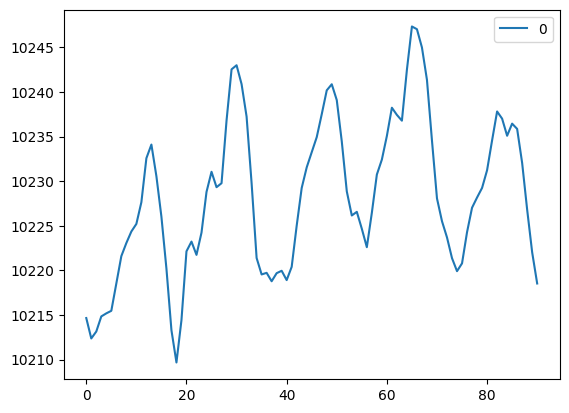

In [42]:
horizonSet = 7*3
windowSet  = 7*13
countData  = 0
for i in range(len(PPG_csvArray)):
    r,g,b = removing_baseline_drift(ppgSignal=PPG_csvArray[i], showFigure='False')
    r_ = splitSignal(individualSignal=r, horizonSize=horizonSet, windowSize=windowSet)
    print(r_.shape)
    countData += r_.shape[0]*r_.shape[1]
print(f'dCount={countData}')
### Plotting on the first one
pd.DataFrame(r_[0]).plot()
plt.show()

In [111]:
horizonSet = 7*3
windowSize  = 7*13
overallSignal  = []
for i in range (0, len(r), horizonSet):
        if i+windowSize < len(r): #Only consider sets with windowSize data
            splittedSignal = []
            for j in range(windowSize):
                splittedSignal.append(r[i+j])
            overallSignal.append(splittedSignal)


In [113]:
len(r)

3646

> __Algorithm 03:__ Butter Low-pass Filter (Ignore this in SCI)

In [58]:
def butter_lowPass(cutoff, fs, order=2):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = scipy.signal.butter(order,[0.1,0.5],  btype='band' , analog=False)
    return b, a

def butter_lowPass_filter(data, cutoff, fs, order=2):
    b, a = butter_lowPass(cutoff, fs,  order=order)
    y = scipy.signal.lfilter(b, a, data)
    return y

>> Test Algorithm 03

Actual Splitted Signal


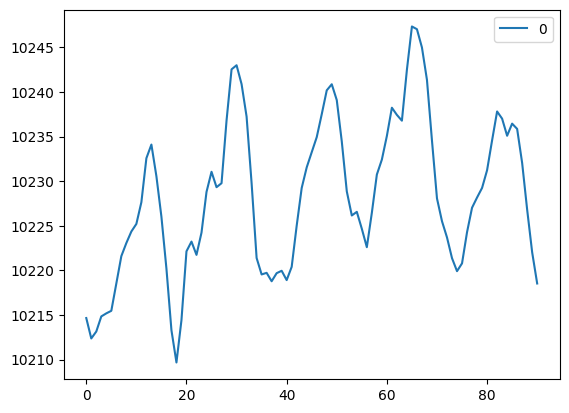

After applying mean function


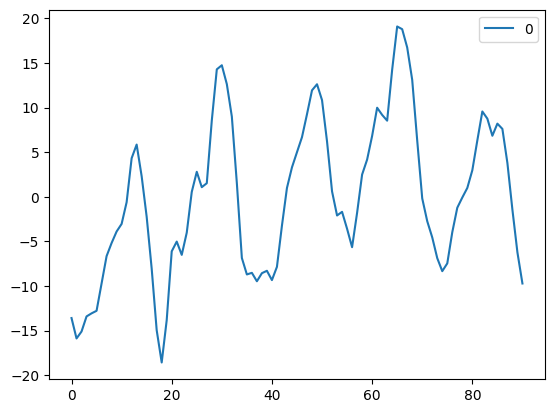

After applying filter


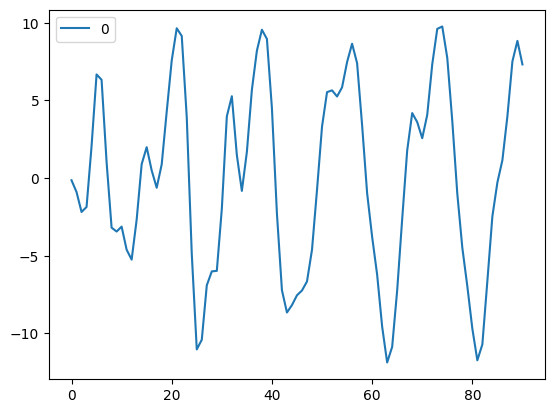

In [59]:
print('Actual Splitted Signal')
pd.DataFrame(r_[0]).plot()
plt.show()
print('After applying mean function')
data = r_[0]-np.mean(r_[0])
pd.DataFrame(data).plot()
plt.show()
print('After applying filter')
filteredSignal_r = butter_lowPass_filter(
    data  = data, 
    cutoff= 8, 
    fs    = 32, 
    order = 6)
pd.DataFrame(filteredSignal_r).plot()
plt.show()

> __Algorithm 04:__ Determine AC_DC_from_Signal
>> ACK: __Developed by Shama__. _This algorithm is developed to determine __r1__ and __r2__ which significantly improve the performance of the trained models_

In [60]:
def determine_ac_dc_from_PPG (Signal):
    uPeak =  scipy.signal.find_peaks(Signal)
    uPeak =  pd.DataFrame(uPeak[0])
    lPeak =  scipy.signal.find_peaks(-Signal)
    lPeak =  pd.DataFrame(lPeak[0])

    if (len(uPeak)<len(lPeak)):
        indexLength = len(uPeak)
    else:
        indexLength = len(lPeak)

    for index in range(indexLength):
        newValue_ac =  Signal[uPeak.iloc[index]] - Signal[lPeak.iloc[index]]
        newValue_dc =  Signal[lPeak.iloc[index]]
        if index ==0:
            allValue_ac = newValue_ac
            allValue_dc = newValue_dc
        else:
            allValue_ac =  np.append(allValue_ac,newValue_ac)
            allValue_dc =  np.append(allValue_dc,newValue_dc)

    meanValue_ac = np.mean(allValue_ac)
    meanValue_dc = np.mean(allValue_dc)

    return meanValue_ac,meanValue_dc

> __Algorithm 05:__ Kaiser–Teager Energy

In [61]:
def get_kaiser_teager_energy(x):
    x         = np.array(x)
    l         = len(x)
    squ       = x[1:l-1]**2
    oddi      = x[0:l-2]
    eveni     = x[2:l]
    ex        = squ - (oddi*eveni)
    kte       = np.zeros([l,])
    kte[0]    = ex[0]
    kte[-1]   = ex[-1]
    kte[1:-1] = ex
    return kte

> __Algorithm 06v1:__ Constructing Features Set _(Red, Green, Blue; Reflected, FeatureCount=[4+4+r1+r2]+[HbA1c]=11)_
>> ACK: __Developed by Shama, Guided by Honorable Professor Kim__. _Significantly improve the performance_

In [62]:
def construct_feature_set_v1 (PPG, HbA1c, SpO2, BMI, samplingRate=32):
    # Initialization
    sr         = samplingRate
    l          = 0

    for i in range (0,len(PPG)):
        
        # Getting corresponding PPG Data
        # > __Algorithm 01:__ Baseline Dirft Removal by () 
        r,g,b = removing_baseline_drift(ppgSignal=PPG[i], showFigure='False')
        print('PPG_data_info:'+str(PPG[i]))

        # > __Algorithm 04:__ Determine AC_DC_from_Signal
        r_ac,r_dc = determine_ac_dc_from_PPG(r)
        g_ac,g_dc = determine_ac_dc_from_PPG(g)
        b_ac,b_dc = determine_ac_dc_from_PPG(b)

        # Calculate r1 & r2
        r1 = (g_ac/g_dc)/(r_ac/r_dc)
        r2 = (b_ac/b_dc)/(r_ac/r_dc)

        # > __Algorithm 02:__ Split_Signal
        r_sp = splitSignal(individualSignal=r, horizonSize=horizonSet, windowSize=windowSet)
        g_sp = splitSignal(individualSignal=g, horizonSize=horizonSet, windowSize=windowSet)
        b_sp = splitSignal(individualSignal=b, horizonSize=horizonSet, windowSize=windowSet)
        
        # Constructing Feature Set
        for j in range(len(r_sp)):  ### You can also use r_sp.shape[0]
            # Initialize frame
            featureFrame       = []
            
            # >>>>>>>>>>>>>>>>Red>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
            # > __Algorithm 03:__ Filter
            filteredSignal_r   = butter_lowPass_filter(
                data  = r_sp[j]-np.mean(r_sp[j]), 
                cutoff= 8, 
                fs    = sr, 
                order = 2
                )

            fqSignal_r, psdSignal_r    = scipy.signal.welch(
                x       = filteredSignal_r, 
                nperseg = len(filteredSignal_r) # Added to overcome error
                ) 


            # > __Algorithm 05:__ Kaiser–Teager Energy
            kteSignal_r            = get_kaiser_teager_energy(
                filteredSignal_r
                )



            # Insert Feature one by one
            # Add new feature (5)
            ar_coeffs_r, _r        = statsmodels.regression.linear_model.yule_walker(filteredSignal_r, order = 2)
            # featureFrame           = np.append(featureFrame,ar_coeffs_r)
            
            # Add new feature
            zcSignal_r             = tsfel.feature_extraction.features.zero_cross(filteredSignal_r)
            featureFrame           = np.append(featureFrame,zcSignal_r)
            
            # Add new feature
            skewSignal_r           = tsfel.feature_extraction.features.skewness(filteredSignal_r)
            # featureFrame           = np.append(featureFrame,skewSignal_r)
            
            # Add new feature
            absWavelength_r        = tsfel.feature_extraction.wavelet_abs_mean(filteredSignal_r)
            maWavelength_r         = np.mean(absWavelength_r)
            # featureFrame           = np.append(featureFrame,maWavelength_r)
            
            # Add new feature
            autocorr_r             = tsfel.feature_extraction.autocorr(filteredSignal_r)
            # featureFrame           = np.append(featureFrame,autocorr_r)
            
            # Add new feature
            kurtSpectral_r         = tsfel.feature_extraction.features.spectral_kurtosis(filteredSignal_r, sr)
            # featureFrame           = np.append(featureFrame,kurtSpectral_r)
            
            # Add new feature
            skewSpectral_r         = tsfel.feature_extraction.features.spectral_skewness(filteredSignal_r, sr)
            # featureFrame           = np.append(featureFrame,skewSpectral_r)
            
            # Add new feature
            sum_abs_diff_r         = tsfel.feature_extraction.features.sum_abs_diff(filteredSignal_r)
            featureFrame           = np.append(featureFrame,sum_abs_diff_r)
            
            # Add new feature
            kurtPSD_r              = scipy.stats.kurtosis(psdSignal_r)
            # featureFrame           = np.append(featureFrame,kurtPSD_r)
            
            # Add new feature
            varPSD_r               = np.var(psdSignal_r)
            featureFrame           = np.append(featureFrame,varPSD_r)
            
            # Add new feature
            meanPSD_r              = np.mean(psdSignal_r)
            # featureFrame           = np.append(featureFrame,meanPSD_r)
            
            # Add new feature
            skewKTE_r              = scipy.stats.skew(kteSignal_r)
            # featureFrame           = np.append(featureFrame,skewKTE_r)
            
            # Add new feature
            kurtKTE_r              = scipy.stats.kurtosis(kteSignal_r)
            # featureFrame           = np.append(featureFrame,kurtKTE_r)
            
            # Add new feature
            varKTE_r               = np.var(kteSignal_r)
            featureFrame           = np.append(featureFrame,varKTE_r)
            
            # Add new feature
            meanKTE_r              = np.mean(kteSignal_r)
            # featureFrame           = np.append(featureFrame,meanKTE_r)
            
            
            # >>>>>>>>>>>>>>>>Green>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
           
            # > __Algorithm 03:__ Butter Low-pass Filter
            filteredSignal_g = butter_lowPass_filter(
                data  = g_sp[j]-np.mean(g_sp[j]), 
                cutoff= 8, 
                fs    = sr, 
                order = 2
                )

            fqSignal_g, psdSignal_g    = scipy.signal.welch(
                x       = filteredSignal_g, 
                nperseg = len(filteredSignal_g) # Added to overcome error
                ) 
           
            # > __Algorithm 05:__ Kaiser–Teager Energy
            kteSignal_g            = get_kaiser_teager_energy(
                filteredSignal_g
                )
            
            
            # Insert Feature one by one
            # Add new feature
            ar_coeffs_g, _g        = statsmodels.regression.linear_model.yule_walker(filteredSignal_g, order = 2)
            # featureFrame           = np.append(featureFrame,ar_coeffs_g)
            
            # Add new feature
            zcSignal_g             = tsfel.feature_extraction.features.zero_cross(filteredSignal_g)
            featureFrame           = np.append(featureFrame,zcSignal_g)
            
            # Add new feature
            skewSignal_g           = tsfel.feature_extraction.features.skewness(filteredSignal_g)
            # featureFrame           = np.append(featureFrame,skewSignal_g)
            
            # Add new feature
            absWavelength_g        = tsfel.feature_extraction.wavelet_abs_mean(filteredSignal_g)
            maWavelength_g         = np.mean(absWavelength_g)
            # featureFrame           = np.append(featureFrame,maWavelength_g)
            
            # Add new feature
            autocorr_g             = tsfel.feature_extraction.autocorr(filteredSignal_g)
            # featureFrame           = np.append(featureFrame,autocorr_g)
            
            # Add new feature
            kurtSpectral_g         = tsfel.feature_extraction.features.spectral_kurtosis(filteredSignal_g, sr)
            # featureFrame           = np.append(featureFrame,kurtSpectral_g)
            
            # Add new feature
            skewSpectral_g         = tsfel.feature_extraction.features.spectral_skewness(filteredSignal_g, sr)
            # featureFrame           = np.append(featureFrame,skewSpectral_g)
            
            # Add new feature
            sum_abs_diff_g         = tsfel.feature_extraction.features.sum_abs_diff(filteredSignal_g)
            featureFrame           = np.append(featureFrame,sum_abs_diff_g)
            
            # Add new feature
            kurtPSD_g              = scipy.stats.kurtosis(psdSignal_g)
            # featureFrame           = np.append(featureFrame,kurtPSD_g)
            
            # Add new feature
            varPSD_g               = np.var(psdSignal_g)
            featureFrame           = np.append(featureFrame,varPSD_g)
            
            # Add new feature
            meanPSD_g              = np.mean(psdSignal_g)
            # featureFrame           = np.append(featureFrame,meanPSD_g)
            
            # Add new feature
            skewKTE_g              = scipy.stats.skew(kteSignal_g)
            # featureFrame           = np.append(featureFrame,skewKTE_g)
            
            # Add new feature
            kurtKTE_g              = scipy.stats.kurtosis(kteSignal_g)
            # featureFrame           = np.append(featureFrame,kurtKTE_g)
            
            # Add new feature
            varKTE_g               = np.var(kteSignal_g)
            featureFrame           = np.append(featureFrame,varKTE_g)
            
            # Add new feature
            meanKTE_g              = np.mean(kteSignal_g)
            # featureFrame           = np.append(featureFrame,meanKTE_g)


            # >>>>>>>>>>>>>>>>Add_r1_r2_as_features>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
            # filteredSignal_b = butter_lowPass_filter(
            #     data  = b_sp[j]-np.mean(b_sp[j]), 
            #     cutoff= 8, 
            #     fs    = sr, 
            #     order = 6
            #     )

            
            featureFrame           = np.append(featureFrame,r1)
            featureFrame           = np.append(featureFrame,r2)
            
            
            # >>>>>>>>>>>>>>>>Add_other_features>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
            # featureFrame           = np.append(featureFrame,SpO2[i])
            # featureFrame           = np.append(featureFrame,BMI[i])

            # >>>>>>>>>>>>>>> Add output feature 
            featureFrame           = np.append(featureFrame,HbA1c[i])

            ## Insert featureFrame into featureSet
            # Initialized feature set array 
            if l == 0:
                k = len(featureFrame)
                # print('kCount='+str(k))
                featureSet = np.empty([150000,k]) 
            # Save into featureSet
            featureSet[l][:k] = featureFrame
            # Length increased for next cycle
            l = l + 1


            # Checking outputs
            print(f'iCount={i} || jCount={j} || lCount={l} || fCount={len(featureFrame)}')
            print(featureFrame)

        # Check point    
        # print('iCount='+str(i))

    # Gather all
    print('**********************************************************************')
    print('*****************************Summary**********************************')    
    featureSet = featureSet[0:l][:]
    # Check for null
    featureSet = featureSet[~np.isnan(featureSet).any(axis=1)]
    print('**********************************************************************')
    return featureSet

> __Algorithm 06v2:__ Constructing Features Set _(Red, Green, Blue; Reflected, FeatureCount=[4+4+r1+r2+SpO2+BMI]+[HbA1c]=13)_
>> ACK: __Developed by Shama, Guided by Honorable Professor Kim__. _Significantly improve the performance_

In [63]:
def construct_feature_set_v2 (PPG, HbA1c, SpO2, BMI, samplingRate=32):
    # Initialization
    sr         = samplingRate
    l          = 0

    for i in range (0,len(PPG)):
        
        # Getting corresponding PPG Data
        # > __Algorithm 01:__ Baseline Dirft Removal by () 
        r,g,b = removing_baseline_drift(ppgSignal=PPG[i], showFigure='False')
        print('PPG_data_info:'+str(PPG[i]))

        # > __Algorithm 04:__ Determine AC_DC_from_Signal
        r_ac,r_dc = determine_ac_dc_from_PPG(r)
        g_ac,g_dc = determine_ac_dc_from_PPG(g)
        b_ac,b_dc = determine_ac_dc_from_PPG(b)

        # Calculate r1 & r2
        r1 = (g_ac/g_dc)/(r_ac/r_dc)
        r2 = (b_ac/b_dc)/(r_ac/r_dc)

        # > __Algorithm 02:__ Split_Signal
        r_sp = splitSignal(individualSignal=r, horizonSize=horizonSet, windowSize=windowSet)
        g_sp = splitSignal(individualSignal=g, horizonSize=horizonSet, windowSize=windowSet)
        b_sp = splitSignal(individualSignal=b, horizonSize=horizonSet, windowSize=windowSet)
        
        # Constructing Feature Set
        for j in range(len(r_sp)):  ### You can also use r_sp.shape[0]
            # Initialize frame
            featureFrame       = []
            
            # >>>>>>>>>>>>>>>>Red>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
            # > __Algorithm 03:__ Filter
            filteredSignal_r   = butter_lowPass_filter(
                data  = r_sp[j]-np.mean(r_sp[j]), 
                cutoff= 8, 
                fs    = sr, 
                order = 2
                )

            fqSignal_r, psdSignal_r    = scipy.signal.welch(
                x       = filteredSignal_r, 
                nperseg = len(filteredSignal_r) # Added to overcome error
                ) 


            # > __Algorithm 05:__ Kaiser–Teager Energy
            kteSignal_r            = get_kaiser_teager_energy(
                filteredSignal_r
                )



            # Insert Feature one by one
            # Add new feature (5)
            ar_coeffs_r, _r        = statsmodels.regression.linear_model.yule_walker(filteredSignal_r, order = 2)
            # featureFrame           = np.append(featureFrame,ar_coeffs_r)
            
            # Add new feature
            zcSignal_r             = tsfel.feature_extraction.features.zero_cross(filteredSignal_r)
            featureFrame           = np.append(featureFrame,zcSignal_r)
            
            # Add new feature
            skewSignal_r           = tsfel.feature_extraction.features.skewness(filteredSignal_r)
            # featureFrame           = np.append(featureFrame,skewSignal_r)
            
            # Add new feature
            absWavelength_r        = tsfel.feature_extraction.wavelet_abs_mean(filteredSignal_r)
            maWavelength_r         = np.mean(absWavelength_r)
            # featureFrame           = np.append(featureFrame,maWavelength_r)
            
            # Add new feature
            autocorr_r             = tsfel.feature_extraction.autocorr(filteredSignal_r)
            # featureFrame           = np.append(featureFrame,autocorr_r)
            
            # Add new feature
            kurtSpectral_r         = tsfel.feature_extraction.features.spectral_kurtosis(filteredSignal_r, sr)
            # featureFrame           = np.append(featureFrame,kurtSpectral_r)
            
            # Add new feature
            skewSpectral_r         = tsfel.feature_extraction.features.spectral_skewness(filteredSignal_r, sr)
            # featureFrame           = np.append(featureFrame,skewSpectral_r)
            
            # Add new feature
            sum_abs_diff_r         = tsfel.feature_extraction.features.sum_abs_diff(filteredSignal_r)
            featureFrame           = np.append(featureFrame,sum_abs_diff_r)
            
            # Add new feature
            kurtPSD_r              = scipy.stats.kurtosis(psdSignal_r)
            # featureFrame           = np.append(featureFrame,kurtPSD_r)
            
            # Add new feature
            varPSD_r               = np.var(psdSignal_r)
            featureFrame           = np.append(featureFrame,varPSD_r)
            
            # Add new feature
            meanPSD_r              = np.mean(psdSignal_r)
            # featureFrame           = np.append(featureFrame,meanPSD_r)
            
            # Add new feature
            skewKTE_r              = scipy.stats.skew(kteSignal_r)
            # featureFrame           = np.append(featureFrame,skewKTE_r)
            
            # Add new feature
            kurtKTE_r              = scipy.stats.kurtosis(kteSignal_r)
            # featureFrame           = np.append(featureFrame,kurtKTE_r)
            
            # Add new feature
            varKTE_r               = np.var(kteSignal_r)
            featureFrame           = np.append(featureFrame,varKTE_r)
            
            # Add new feature
            meanKTE_r              = np.mean(kteSignal_r)
            # featureFrame           = np.append(featureFrame,meanKTE_r)
            
            
            # >>>>>>>>>>>>>>>>Green>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
           
            # > __Algorithm 03:__ Butter Low-pass Filter
            filteredSignal_g = butter_lowPass_filter(
                data  = g_sp[j]-np.mean(g_sp[j]), 
                cutoff= 8, 
                fs    = sr, 
                order = 2
                )

            fqSignal_g, psdSignal_g    = scipy.signal.welch(
                x       = filteredSignal_g, 
                nperseg = len(filteredSignal_g) # Added to overcome error
                ) 
           
            # > __Algorithm 05:__ Kaiser–Teager Energy
            kteSignal_g            = get_kaiser_teager_energy(
                filteredSignal_g
                )
            
            
            # Insert Feature one by one
            # Add new feature
            ar_coeffs_g, _g        = statsmodels.regression.linear_model.yule_walker(filteredSignal_g, order = 2)
            # featureFrame           = np.append(featureFrame,ar_coeffs_g)
            
            # Add new feature
            zcSignal_g             = tsfel.feature_extraction.features.zero_cross(filteredSignal_g)
            featureFrame           = np.append(featureFrame,zcSignal_g)
            
            # Add new feature
            skewSignal_g           = tsfel.feature_extraction.features.skewness(filteredSignal_g)
            # featureFrame           = np.append(featureFrame,skewSignal_g)
            
            # Add new feature
            absWavelength_g        = tsfel.feature_extraction.wavelet_abs_mean(filteredSignal_g)
            maWavelength_g         = np.mean(absWavelength_g)
            # featureFrame           = np.append(featureFrame,maWavelength_g)
            
            # Add new feature
            autocorr_g             = tsfel.feature_extraction.autocorr(filteredSignal_g)
            # featureFrame           = np.append(featureFrame,autocorr_g)
            
            # Add new feature
            kurtSpectral_g         = tsfel.feature_extraction.features.spectral_kurtosis(filteredSignal_g, sr)
            # featureFrame           = np.append(featureFrame,kurtSpectral_g)
            
            # Add new feature
            skewSpectral_g         = tsfel.feature_extraction.features.spectral_skewness(filteredSignal_g, sr)
            # featureFrame           = np.append(featureFrame,skewSpectral_g)
            
            # Add new feature
            sum_abs_diff_g         = tsfel.feature_extraction.features.sum_abs_diff(filteredSignal_g)
            featureFrame           = np.append(featureFrame,sum_abs_diff_g)
            
            # Add new feature
            kurtPSD_g              = scipy.stats.kurtosis(psdSignal_g)
            # featureFrame           = np.append(featureFrame,kurtPSD_g)
            
            # Add new feature
            varPSD_g               = np.var(psdSignal_g)
            featureFrame           = np.append(featureFrame,varPSD_g)
            
            # Add new feature
            meanPSD_g              = np.mean(psdSignal_g)
            # featureFrame           = np.append(featureFrame,meanPSD_g)
            
            # Add new feature
            skewKTE_g              = scipy.stats.skew(kteSignal_g)
            # featureFrame           = np.append(featureFrame,skewKTE_g)
            
            # Add new feature
            kurtKTE_g              = scipy.stats.kurtosis(kteSignal_g)
            # featureFrame           = np.append(featureFrame,kurtKTE_g)
            
            # Add new feature
            varKTE_g               = np.var(kteSignal_g)
            featureFrame           = np.append(featureFrame,varKTE_g)
            
            # Add new feature
            meanKTE_g              = np.mean(kteSignal_g)
            # featureFrame           = np.append(featureFrame,meanKTE_g)


            # >>>>>>>>>>>>>>>>Add_r1_r2_as_features>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
            
            featureFrame           = np.append(featureFrame,r1)
            featureFrame           = np.append(featureFrame,r2)
            
            
            # >>>>>>>>>>>>>>>>Add_other_features>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
            featureFrame           = np.append(featureFrame,SpO2[i])
            featureFrame           = np.append(featureFrame,BMI[i])

            # >>>>>>>>>>>>>>> Add output feature 
            featureFrame           = np.append(featureFrame,HbA1c[i])

            ## Insert featureFrame into featureSet
            # Initialized feature set array 
            if l == 0:
                k = len(featureFrame)
                # print('kCount='+str(k))
                featureSet = np.empty([150000,k]) 
            # Save into featureSet
            featureSet[l][:k] = featureFrame
            # Length increased for next cycle
            l = l + 1


            # Checking outputs
            print(f'iCount={i} || jCount={j} || lCount={l} || fCount={len(featureFrame)}')
            print(featureFrame)

        # Check point    
        # print('iCount='+str(i))

    # Gather all
    print('**********************************************************************')
    print('*****************************Summary**********************************')    
    featureSet = featureSet[0:l][:]
    # Check for null
    featureSet = featureSet[~np.isnan(featureSet).any(axis=1)]
    print('**********************************************************************')
    return featureSet

# __Main Function__

## __Test 01:__

>  Utilizing __Algorithm 06v2:__ Constructing Features Set _(Red, Green, Blue; Reflected, FeatureCount=[4+4+r1+r2]+[HbA1c]=11)_

In [64]:
# Initialize
loo                = sk.model_selection.LeaveOneOut()
t1_scores          = []
t1_test_cases      = []
t1_train_cases     = []
countEpoch         = 0
percent            = 0.02
# XG Boost
t1_results_xg      = []
t1_e_results_xg    = []
# Random Forest
t1_results_rf      = []
t1_e_results_rf    = []
# Cat Boost
t1_results_cb      = []
t1_e_results_cb    = []
# Light GBM
t1_results_lg      = []
t1_e_results_lg    = []

for train_index, test_index in loo.split(PPG_csvArray):
    print('Epoch # '+str(countEpoch))
    countEpoch +=1

    X_train, X_test      = PPG_csvArray[train_index], PPG_csvArray[test_index]
    y_train, y_test      = HbA1c_Array [train_index], HbA1c_Array [test_index]
    sp_train, sp_test    = SpO2_Array  [train_index], SpO2_Array  [test_index]
    bmi_train, bmi_test  = BMI_Array   [train_index], BMI_Array   [test_index]
    
    
    # > __Algorithm 06v1:__ Constructing Features Set _(Red, Green, Blue; Reflected, FeatureCount=[4+4+r1+r2]+[HbA1c]=11)_
    print('*************************************************************')
    print('*********************Training Array Set**********************')
    print('*************************************************************')
    train_array = construct_feature_set_v1(
        PPG          = X_train,
        HbA1c        = y_train,
        SpO2         = sp_train,
        BMI          = bmi_train,
        samplingRate = 32
        )
    print('*************************************************************')
    print('*********************Testing Array Set***********************')
    print('*************************************************************')
    test_array  = construct_feature_set_v1(
        PPG          = X_test,
        HbA1c        = y_test,
        SpO2         = sp_test,
        BMI          = bmi_test,
        samplingRate = 32
        )
    
    feature_train, hba1c_train = train_array[:,:-1], train_array[:,-1]
    feature_test, hba1c_test   = test_array[:,:-1],  test_array[:,-1]
    
    train = np.sort(np.array(random.sample(range(feature_test.shape[0]), int(feature_test.shape[0] * percent))))
    if train.shape[0] == 0:
        feature_train, hba1c_train = np.append(feature_train, np.expand_dims(feature_test[0],axis=0), 0), np.append(hba1c_train, np.expand_dims(hba1c_test[0],axis=0), 0)
        # feature_test, hba1c_test = np.delete(feature_test, 0, axis = 0), np.delete(hba1c_test, 0, axis = 0)
    else:
        test = np.delete(np.arange(feature_test.shape[0]), train)

        feature_train, hba1c_train = np.append(feature_train, feature_test[train], 0), np.append(hba1c_train, hba1c_test[train], 0)
        feature_test, hba1c_test = np.delete(feature_test, train, axis = 0), np.delete(hba1c_test, train, axis = 0)
    
    feature_train, hba1c_train = sk.utils.shuffle(feature_train, hba1c_train, random_state=0)
    # print(feature_train.shape)
    # print(feature_test.shape)

    # XGboost
    xg = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
    xg.fit(feature_train, hba1c_train)
    t1_results_xg.append(np.nanmean(xg.predict(feature_test)))
    t1_e_results_xg.append(np.nanmean(hba1c_test))

    # Random Forest
    rf = RandomForestRegressor(random_state=42, n_estimators=1000, n_jobs=-1)
    rf.fit(feature_train, hba1c_train)
    t1_results_rf.append(np.nanmean(rf.predict(feature_test)))
    t1_e_results_rf.append(np.nanmean(hba1c_test))

    # Cat boost
    cb = cab.CatBoostRegressor()
    cb.fit(feature_train, hba1c_train)
    t1_results_cb.append(np.nanmean(cb.predict(feature_test)))
    t1_e_results_cb.append(np.nanmean(hba1c_test))

    # Light GBM
    # lg = ltb.LGBMRegressor(boosting_type='dart')
    lg = ltb.LGBMRegressor(
        application = 'regression',
        objective = 'root_mean_squared_error',
        boosting_type="dart",
        num_iterations = 3500,
        learning_rate = 0.05,
        num_leaves=150,
        tree_learner='feature',
        max_depth =10,
        min_data_in_leaf=7,
        bagging_fraction = 1,
        bagging_freq = 100,
        reg_sqrt='True',
        metric ='rmse',
        feature_fraction = 0.6,
        random_state=42
        ) 
    lg.fit(feature_train, hba1c_train)
    t1_results_lg.append(np.nanmean(lg.predict(feature_test)))
    t1_e_results_lg.append(np.nanmean(hba1c_test))



    t1_test_cases.append(X_test)
    t1_train_cases.append(X_train)

    clear_output(wait=True)

Epoch # 27
*************************************************************
*********************Training Array Set**********************
*************************************************************
PPG_data_info:./DataBase/Selected_PPG_wrist/210823_4.csv
iCount=0 || jCount=0 || lCount=1 || fCount=11
[8.00000000e+00 1.16011232e+02 2.16698289e+04 2.91940063e+01
 8.00000000e+00 1.15684473e+02 2.78406416e+04 3.78551214e+01
 3.86823483e+00 1.71747084e+00 8.40000000e+00]
iCount=0 || jCount=1 || lCount=2 || fCount=11
[8.00000000e+00 1.25208197e+02 2.25927242e+04 5.63695226e+01
 8.00000000e+00 1.26940427e+02 2.63746909e+04 9.08056119e+01
 3.86823483e+00 1.71747084e+00 8.40000000e+00]
iCount=0 || jCount=2 || lCount=3 || fCount=11
[8.00000000e+00 1.28439916e+02 1.64613247e+04 3.77349964e+01
 8.00000000e+00 1.26829075e+02 2.20112037e+04 4.71454657e+01
 3.86823483e+00 1.71747084e+00 8.40000000e+00]
iCount=0 || jCount=3 || lCount=4 || fCount=11
[8.00000000e+00 1.40087879e+02 1.58484842e+04 6.6846499

c:\Users\shama\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] min_data_in_leaf is set=7, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=100, subsample_freq=0 will be ignored. Current value: bagging_freq=100


> Evaluation of __Test 1__

############ HbA1c Evaluation Metrics of XG Boost Regression ############
Diff STD  =  0.17123348088189277
MSE       =  0.03150268745988125
ME        =  -0.046709554536001736
MAD       =  0.11413565703800768
RMSE      =  0.17748996439202205
R2 score  =  0.9613143070210565
Pearson R and p-value:  PearsonRResult(statistic=0.9866872211044081, pvalue=4.862452749562663e-22)
##################################################################################



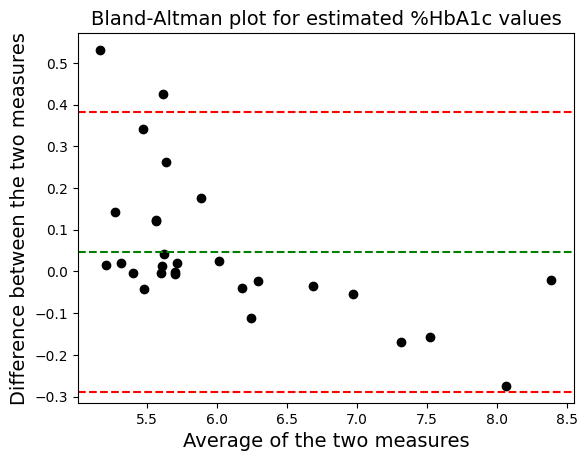

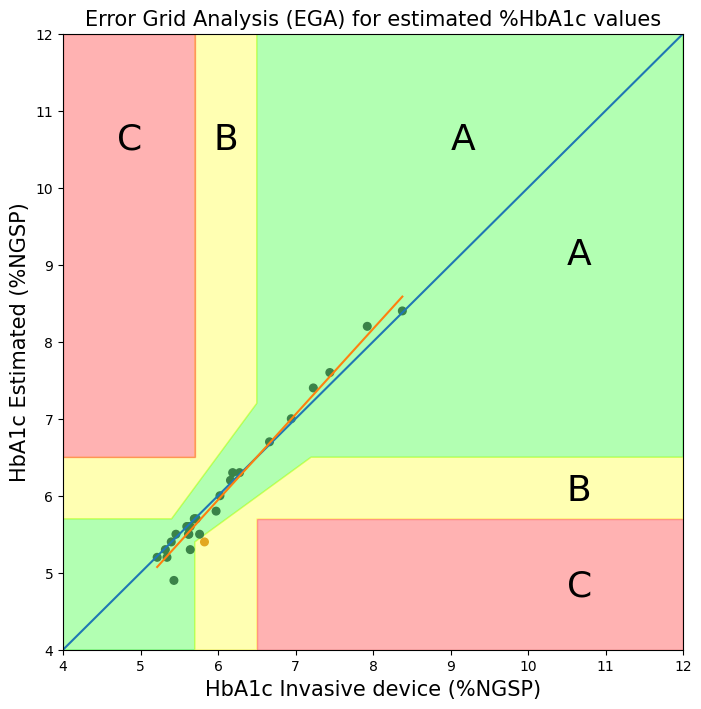

In [71]:
evaluation_metrics_including_BA_and_EGA_plot(
    modelName      = 'XG Boost',
    predictedValue = t1_results_xg,
    exactValue     = t1_e_results_xg
)

############ HbA1c Evaluation Metrics of Random Forest Regression ############
Diff STD  =  0.4827950796742187
MSE       =  0.23309746560067857
ME        =  -0.0025252015847010106
MAD       =  0.32165097712220087
RMSE      =  0.4828016835106093
R2 score  =  0.7137534059631723
Pearson R and p-value:  PearsonRResult(statistic=0.8808279107644752, pvalue=6.277914929958265e-10)
##################################################################################



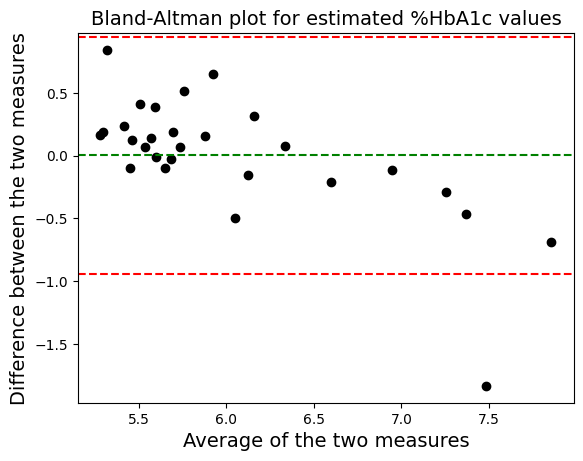

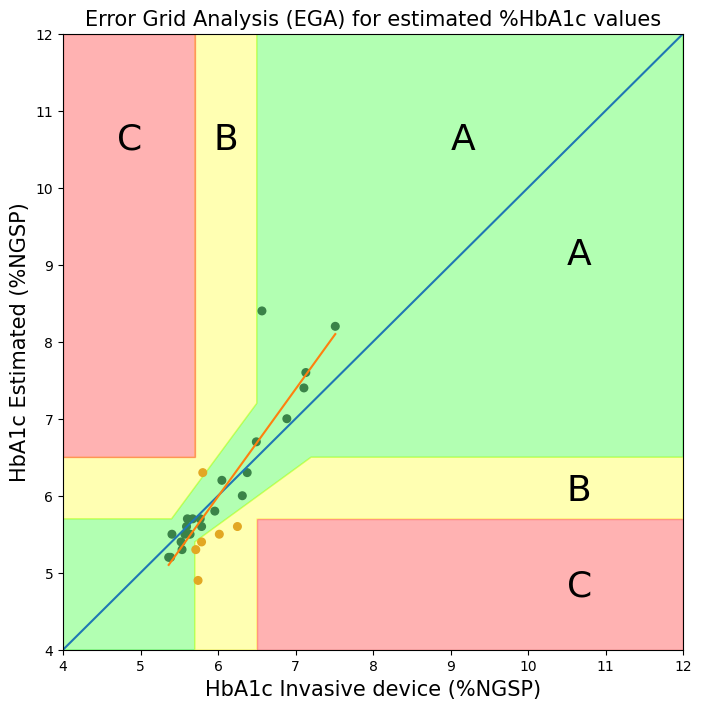

In [72]:
evaluation_metrics_including_BA_and_EGA_plot(
    modelName      = 'Random Forest',
    predictedValue = t1_results_rf,
    exactValue     = t1_e_results_rf
)

############ HbA1c Evaluation Metrics of Cat Boost Regression ############
Diff STD  =  0.22644111637415634
MSE       =  0.05548583036672002
ME        =  -0.06488644836902248
MAD       =  0.17387349116895498
RMSE      =  0.2355543044962669
R2 score  =  0.9318627085075757
Pearson R and p-value:  PearsonRResult(statistic=0.9769148979352746, pvalue=5.899836978364122e-19)
##################################################################################



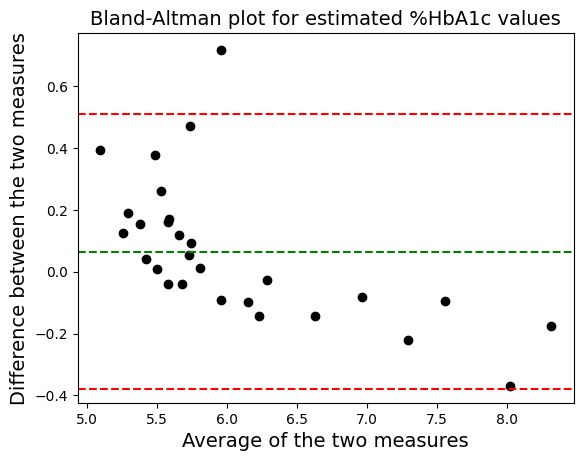

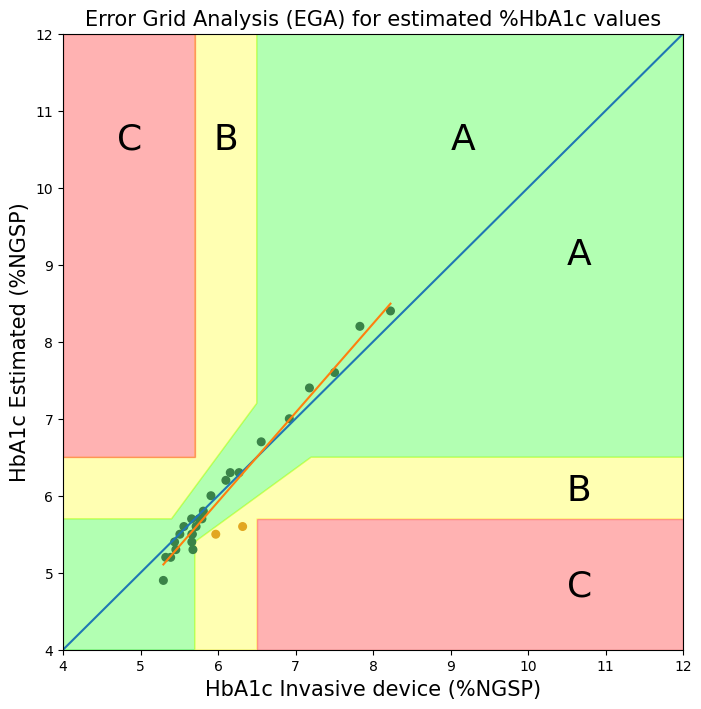

In [73]:
evaluation_metrics_including_BA_and_EGA_plot(
    modelName      = 'Cat Boost',
    predictedValue = t1_results_cb,
    exactValue     = t1_e_results_cb
)

############ HbA1c Evaluation Metrics of Light GBM Regression ############
Diff STD  =  0.6805792115984213
MSE       =  0.4672111177075398
ME        =  0.06342755274808545
MAD       =  0.4671844985294202
RMSE      =  0.6835284322597999
R2 score  =  0.4262589222268516
Pearson R and p-value:  PearsonRResult(statistic=0.6720488337251884, pvalue=8.982580506904878e-05)
##################################################################################



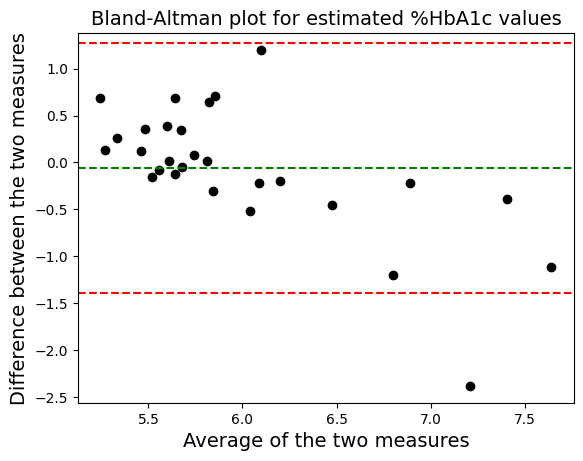

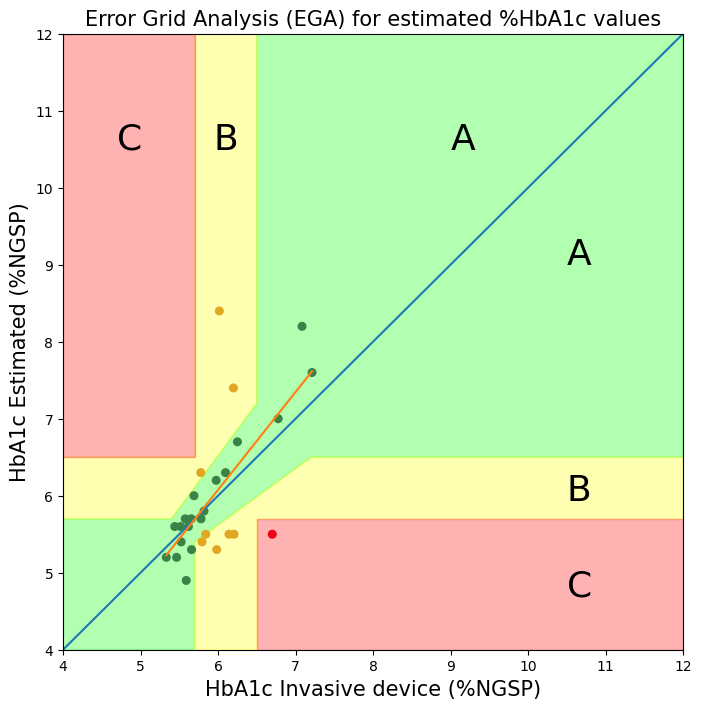

In [74]:
evaluation_metrics_including_BA_and_EGA_plot(
    modelName      = 'Light GBM',
    predictedValue = t1_results_lg,
    exactValue     = t1_e_results_lg
)

In [118]:
params = {
    'num_leaves': [7, 14, 21, 28, 31, 50],
    'learning_rate': [0.1, 0.03, 0.003],
    'max_depth': [-1, 3, 5],
    'n_estimators': [50, 100, 200, 500],
}

grid = GridSearchCV(ltb.LGBMRegressor(random_state=0), params, scoring='r2', cv=5)
#grid.fit(X_train, y_train)
grid.fit(feature_train, hba1c_train)

reg = ltb.LGBMRegressor(random_state=0)
#reg.fit(X_train,y_train)
grid.fit(feature_train, hba1c_train)

lgbm_tuned = grid.best_estimator_

r2_tuned = grid.best_params_
#r2_regular = r2_score(hba1c_train, reg.predict(feature_train))

In [122]:
params = {
    'num_leaves': [500, 700, 1000, 200],
    'learning_rate': [0.5, 0.05, 0.005],
    'max_depth': [10, 12, 9],
    'n_estimators': [5000, 10000, 2000, 3000],
}

grid = GridSearchCV(ltb.LGBMRegressor(random_state=0), params, scoring='r2', cv=5)
#grid.fit(X_train, y_train)
grid.fit(feature_train, hba1c_train)

reg = ltb.LGBMRegressor(random_state=0)
#reg.fit(X_train,y_train)
grid.fit(feature_train, hba1c_train)

lgbm_tuned = grid.best_estimator_

r2_tuned = grid.best_params_

In [123]:
r2_tuned

{'learning_rate': 0.05,
 'max_depth': 12,
 'n_estimators': 10000,
 'num_leaves': 500}

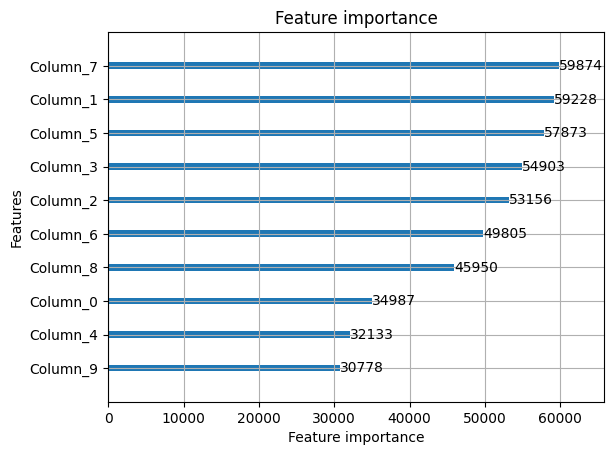

In [56]:
ltb.plot_importance(booster= lg)
plt.show()

In [25]:
pd.DataFrame(train_array)

,0,1,2,3,4,5,6,7,8,9,10
0,7.0,166.926438,4.093122e+05,1.286327e+02,7.0,178.686035,5.038409e+05,144.917493,3.825177,1.569299,8.4
1,7.0,174.340254,3.769066e+05,2.503845e+02,7.0,190.071810,5.057467e+05,323.746844,3.825177,1.569299,8.4
2,7.0,180.991859,2.666379e+05,1.573701e+02,7.0,190.880120,3.679824e+05,167.265787,3.825177,1.569299,8.4
3,8.0,187.812749,3.453753e+05,1.826884e+02,7.0,200.829301,4.222964e+05,221.951056,3.825177,1.569299,8.4
4,7.0,177.433735,3.834222e+05,1.267313e+02,7.0,190.524162,4.928070e+05,148.599225,3.825177,1.569299,8.4
...,...,...,...,...,...,...,...,...,...,...,...
3529,1.0,9.740949,3.876481e+01,2.493317e+00,10.0,1230.031738,3.030226e+08,357777.290556,1.735547,1.041485,8.2
3530,2.0,2.020766,1.130497e-02,3.456624e-03,10.0,1329.259119,4.698932e+08,355410.954322,1.735547,1.041485,8.2
3531,1.0,0.495160,9.593885e-04,1.159542e-05,9.0,1349.837317,3.996369e+08,366786.650495,1.735547,1.041485,8.2
3532,1.0,0.203418,2.060797e-06,5.130076e-07,9.0,1331.244884,2.697910e+08,381663.986784,1.735547,1.041485,8.2


In [69]:
b=rf.feature_importances_
b

array([1.51458608e-03, 2.04440752e-02, 2.56430890e-03, 7.59640808e-03,
       1.94627977e-04, 2.68579149e-03, 1.85481768e-03, 5.37886556e-02,
       7.03432474e-01, 2.05924255e-01])

Text(0, 0.5, 'Importance')

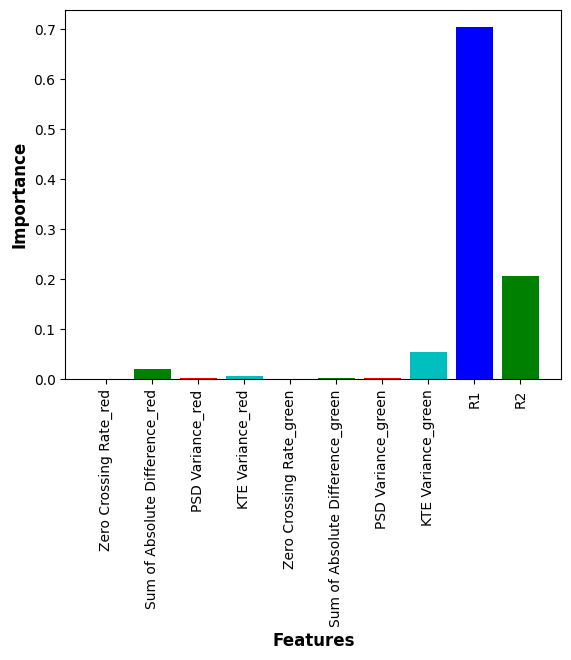

In [70]:
features_frame = ['Zero Crossing Rate_red', 'Sum of Absolute Difference_red', 'PSD Variance_red', 'KTE Variance_red', 'Zero Crossing Rate_green', 'Sum of Absolute Difference_green', 'PSD Variance_green', 'KTE Variance_green', 'R1', 'R2']
colors = ['b', 'g', 'r', 'c']
plt.figure()
plt.bar([x for x in range(len(b))], b,
        tick_label = features_frame, color = colors)
plt.xticks(rotation = 'vertical')
plt.xlabel(xlabel = "Features", fontdict = {'fontsize': 12, 'fontweight' : 'bold'})
plt.ylabel(ylabel = "Importance", fontdict = {'fontsize': 12, 'fontweight' : 'bold'})

## __Test 02:__

>  Utilizing __Algorithm 06v2:__ Constructing Features Set _(Red, Green, Blue; Reflected, FeatureCount=4+4+r1+r2+SpO2+BMI=13)_

In [75]:
# Initialize
loo                = sk.model_selection.LeaveOneOut()
t2_scores          = []
t2_test_cases      = []
t2_train_cases     = []
countEpoch         = 0
percent            = 0.02
# XG Boost
t2_results_xg      = []
t2_e_results_xg    = []
# Random Forest
t2_results_rf      = []
t2_e_results_rf    = []
# Cat Boost
t2_results_cb      = []
t2_e_results_cb    = []
# Light GBM
t2_results_lg      = []
t2_e_results_lg    = []

for train_index, test_index in loo.split(PPG_csvArray):
    print('Epoch # '+str(countEpoch))
    countEpoch +=1

    X_train, X_test      = PPG_csvArray[train_index], PPG_csvArray[test_index]
    y_train, y_test      = HbA1c_Array [train_index], HbA1c_Array [test_index]
    sp_train, sp_test    = SpO2_Array  [train_index], SpO2_Array  [test_index]
    bmi_train, bmi_test  = BMI_Array   [train_index], BMI_Array   [test_index]
    
    
    # > __Algorithm 06v2:__ Constructing Features Set _(Red, Green, Blue; Reflected, FeatureCount=4+4+r1+r2+SpO2+BMI=13)_
    print('*************************************************************')
    print('*********************Training Array Set**********************')
    print('*************************************************************')
    train_array = construct_feature_set_v2(
        PPG          = X_train,
        HbA1c        = y_train,
        SpO2         = sp_train,
        BMI          = bmi_train,
        samplingRate = 32
        )
    print('*************************************************************')
    print('*********************Testing Array Set***********************')
    print('*************************************************************')
    test_array  = construct_feature_set_v2(
        PPG          = X_test,
        HbA1c        = y_test,
        SpO2         = sp_test,
        BMI          = bmi_test,
        samplingRate = 32
        )
    
    feature_train, hba1c_train = train_array[:,:-1], train_array[:,-1]
    feature_test, hba1c_test   = test_array[:,:-1],  test_array[:,-1]
    
    train = np.sort(np.array(random.sample(range(feature_test.shape[0]), int(feature_test.shape[0] * percent))))
    if train.shape[0] == 0:
        feature_train, hba1c_train = np.append(feature_train, np.expand_dims(feature_test[0],axis=0), 0), np.append(hba1c_train, np.expand_dims(hba1c_test[0],axis=0), 0)
        # feature_test, hba1c_test = np.delete(feature_test, 0, axis = 0), np.delete(hba1c_test, 0, axis = 0)
    else:
        test = np.delete(np.arange(feature_test.shape[0]), train)

        feature_train, hba1c_train = np.append(feature_train, feature_test[train], 0), np.append(hba1c_train, hba1c_test[train], 0)
        feature_test, hba1c_test = np.delete(feature_test, train, axis = 0), np.delete(hba1c_test, train, axis = 0)
    
    feature_train, hba1c_train = sk.utils.shuffle(feature_train, hba1c_train, random_state=0)
    # print(feature_train.shape)
    # print(feature_test.shape)

    # XGboost
    xg = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
    xg.fit(feature_train, hba1c_train)
    t2_results_xg.append(np.nanmean(xg.predict(feature_test)))
    t2_e_results_xg.append(np.nanmean(hba1c_test))

    # Random Forest
    rf = RandomForestRegressor(random_state=42, n_estimators=1000, n_jobs=-1)
    rf.fit(feature_train, hba1c_train)
    t2_results_rf.append(np.nanmean(rf.predict(feature_test)))
    t2_e_results_rf.append(np.nanmean(hba1c_test))

    # Cat boost
    cb = cab.CatBoostRegressor()
    cb.fit(feature_train, hba1c_train)
    t2_results_cb.append(np.nanmean(cb.predict(feature_test)))
    t2_e_results_cb.append(np.nanmean(hba1c_test))

    # Light GBM
    # lg = ltb.LGBMRegressor(boosting_type='dart')
    lg = ltb.LGBMRegressor(
        application = 'regression',
        objective = 'root_mean_squared_error',
        boosting_type="dart",
        num_iterations = 3500,
        learning_rate = 0.05,
        num_leaves=150,
        tree_learner='feature',
        max_depth =10,
        min_data_in_leaf=7,
        bagging_fraction = 1,
        bagging_freq = 100,
        reg_sqrt='True',
        metric ='rmse',
        feature_fraction = 0.6,
        random_state=42
        ) 
    lg.fit(feature_train, hba1c_train)
    t2_results_lg.append(np.nanmean(lg.predict(feature_test)))
    t2_e_results_lg.append(np.nanmean(hba1c_test))



    t2_test_cases.append(X_test)
    t2_train_cases.append(X_train)

    clear_output(wait=True)

Epoch # 27
*************************************************************
*********************Training Array Set**********************
*************************************************************
PPG_data_info:./DataBase/Selected_PPG_wrist/210823_4.csv
iCount=0 || jCount=0 || lCount=1 || fCount=13
[8.00000000e+00 1.16011232e+02 2.16698289e+04 2.91940063e+01
 8.00000000e+00 1.15684473e+02 2.78406416e+04 3.78551214e+01
 3.86823483e+00 1.71747084e+00 9.60000000e+01 2.87100000e+01
 8.40000000e+00]
iCount=0 || jCount=1 || lCount=2 || fCount=13
[8.00000000e+00 1.25208197e+02 2.25927242e+04 5.63695226e+01
 8.00000000e+00 1.26940427e+02 2.63746909e+04 9.08056119e+01
 3.86823483e+00 1.71747084e+00 9.60000000e+01 2.87100000e+01
 8.40000000e+00]
iCount=0 || jCount=2 || lCount=3 || fCount=13
[8.00000000e+00 1.28439916e+02 1.64613247e+04 3.77349964e+01
 8.00000000e+00 1.26829075e+02 2.20112037e+04 4.71454657e+01
 3.86823483e+00 1.71747084e+00 9.60000000e+01 2.87100000e+01
 8.40000000e+00]
iCount=0

c:\Users\shama\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


> Evaluation of __Test 2__

############ HbA1c Evaluation Metrics of XG Boost Regression ############
Diff STD  =  0.32685789137143517
MSE       =  0.11514317636149914
ME        =  -0.0911432674952913
MAD       =  0.15231361389160208
RMSE      =  0.33932753551914874
R2 score  =  0.8586027438130801
Pearson R and p-value:  PearsonRResult(statistic=0.9323290239218397, pvalue=5.403683747539739e-13)
##################################################################################



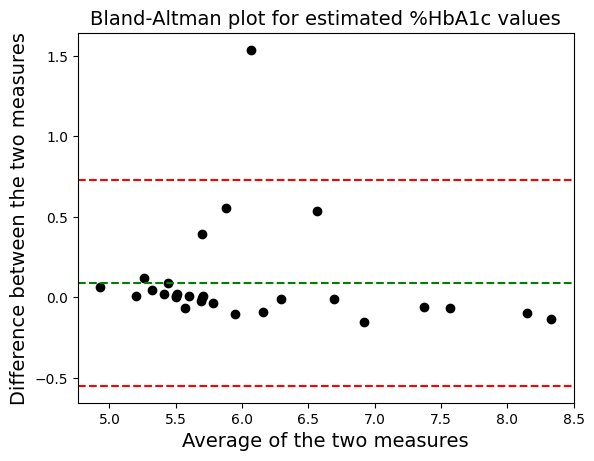

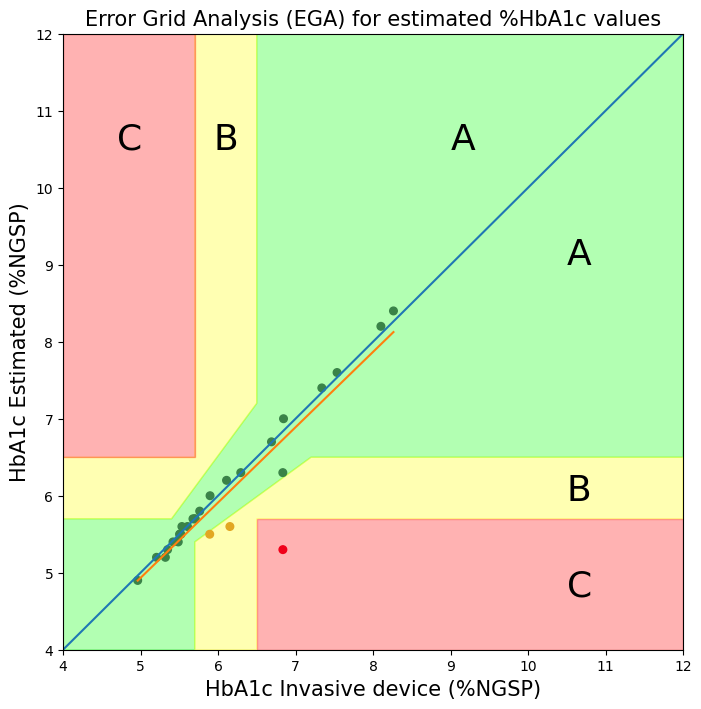

In [76]:
evaluation_metrics_including_BA_and_EGA_plot(
    modelName      = 'XG Boost',
    predictedValue = t2_results_xg,
    exactValue     = t2_e_results_xg
)

############ HbA1c Evaluation Metrics of Random Forest Regression ############
Diff STD  =  0.3627894260461323
MSE       =  0.13893145164628004
ME        =  -0.0855294335033147
MAD       =  0.23152283173088165
RMSE      =  0.3727350958070356
R2 score  =  0.8293904451691124
Pearson R and p-value:  PearsonRResult(statistic=0.9181657694898616, pvalue=5.8909744668652955e-12)
##################################################################################



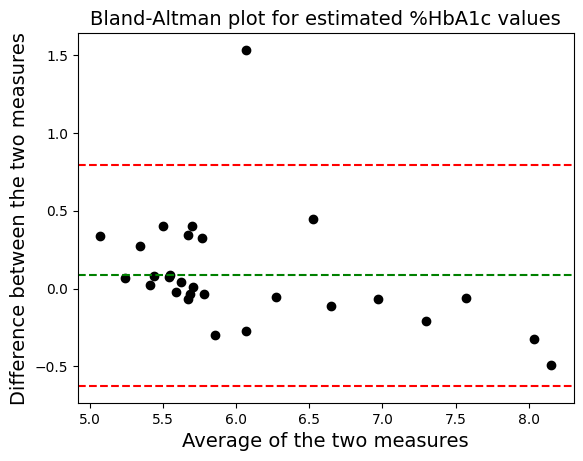

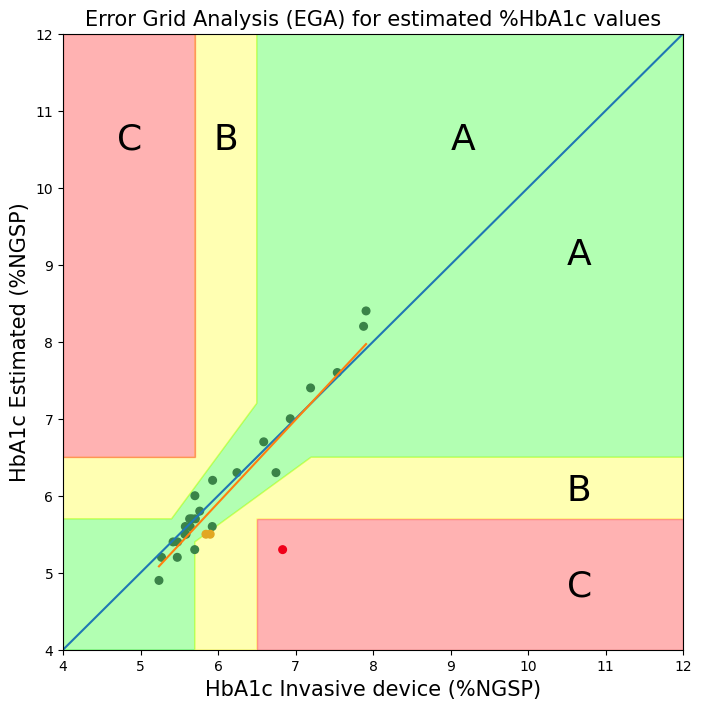

In [77]:
evaluation_metrics_including_BA_and_EGA_plot(
    modelName      = 'Random Forest',
    predictedValue = t2_results_rf,
    exactValue     = t2_e_results_rf
)

############ HbA1c Evaluation Metrics of Cat Boost Regression ############
Diff STD  =  0.12541208780273444
MSE       =  0.015795199740730122
ME        =  -0.008185839827980696
MAD       =  0.09790236578491755
RMSE      =  0.12567895504311818
R2 score  =  0.9806032977824782
Pearson R and p-value:  PearsonRResult(statistic=0.9938823359593973, pvalue=2.0628095743756356e-26)
##################################################################################



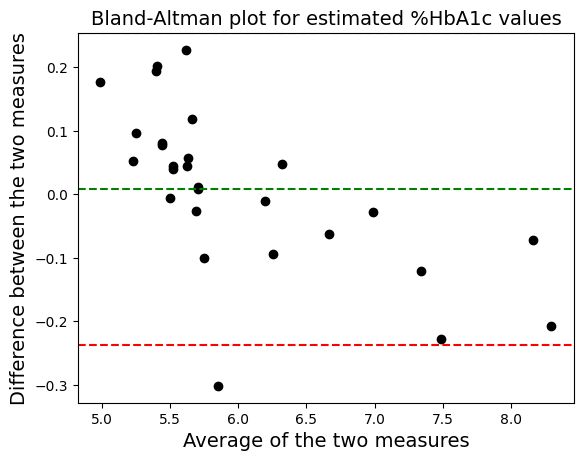

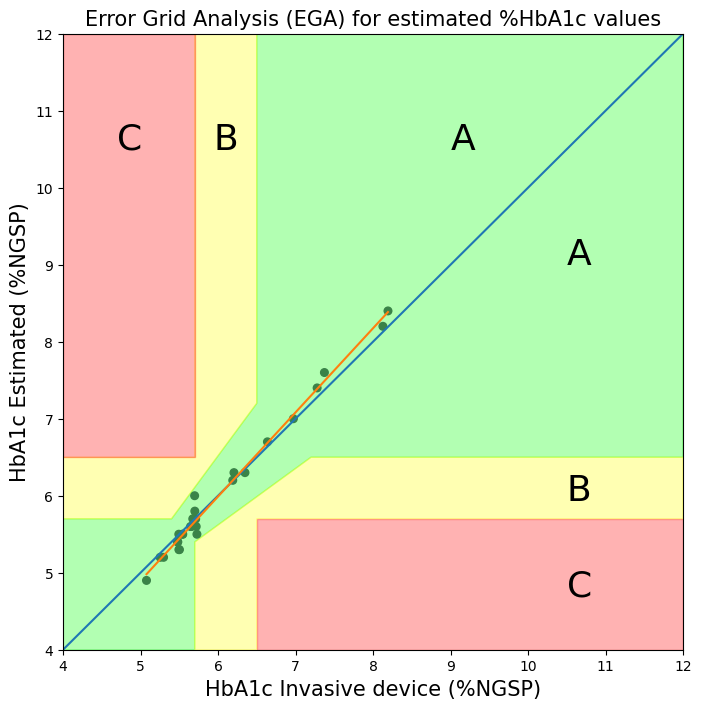

In [78]:
evaluation_metrics_including_BA_and_EGA_plot(
    modelName      = 'Cat Boost',
    predictedValue = t2_results_cb,
    exactValue     = t2_e_results_cb
)

############ HbA1c Evaluation Metrics of Light GBM Regression ############
Diff STD  =  0.37645418011655757
MSE       =  0.1461243381159629
ME        =  0.06638213907922316
MAD       =  0.27313678857480406
RMSE      =  0.38226213272565057
R2 score  =  0.8205574909028165
Pearson R and p-value:  PearsonRResult(statistic=0.9371473065464176, pvalue=2.1265194879278793e-13)
##################################################################################



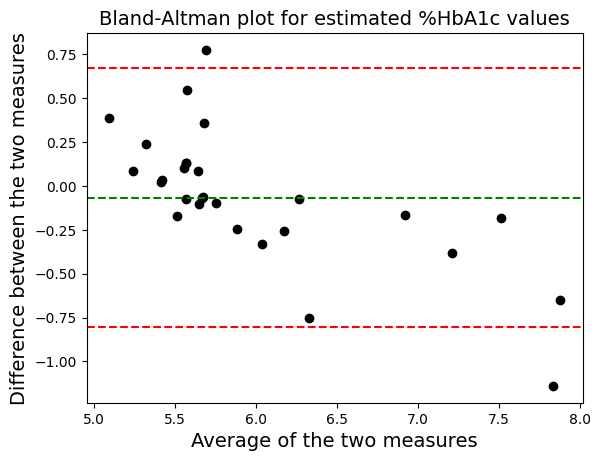

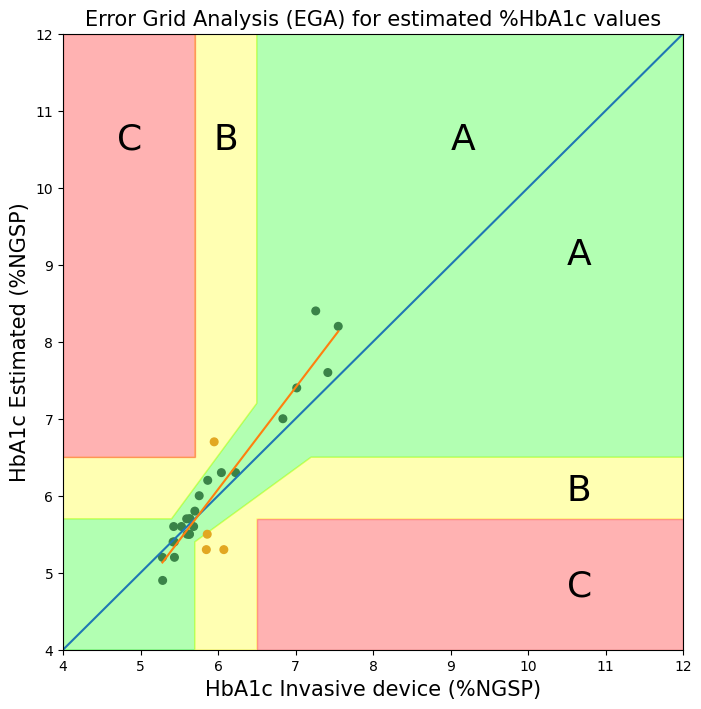

In [79]:
evaluation_metrics_including_BA_and_EGA_plot(
    modelName      = 'Light GBM',
    predictedValue = t2_results_lg,
    exactValue     = t2_e_results_lg
)

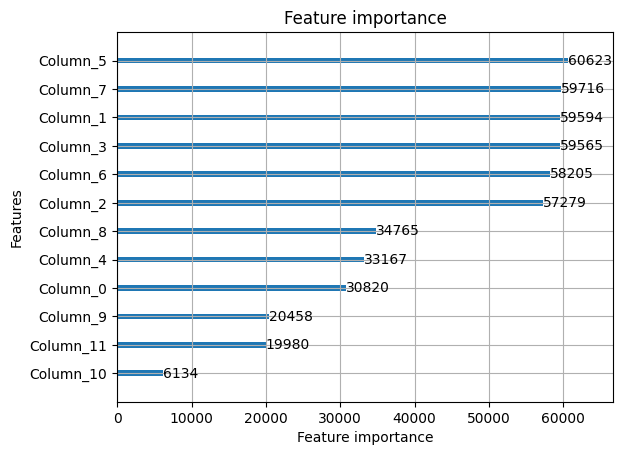

In [62]:
ltb.plot_importance(booster= lg)
plt.show()